In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Karim\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('classes.csv')
df['Degree'] = df['Degree'].astype('category')
df["Degree_encoding"] = df["Degree"].cat.codes

X = np.asarray(df.loc[:, df.columns != 'Degree'])
Y = df['Degree_encoding']

print(X.shape)
print(Y.shape)

(39, 7)
(39,)


In [3]:
from sklearn.model_selection import train_test_split
import keras

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

# The known number of output classes.
num_classes = len(set(df["Degree_encoding"]))
# Input dimensions
shape = X.shape[1::]

# We need to add a channels dimension to our data
# Channels go last for TensorFlow backend in Keras
x_train_reshaped = x_train.reshape((x_train.shape[0],) + shape)
x_test_reshaped = x_test.reshape((x_test.shape[0],) + shape)
input_shape = shape
print(input_shape)

#y_train = y_train.reshape((y_train.shape[0],1))
#y_test = y_test.reshape((y_test.shape[0],1))
# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(7,)


In [4]:
model = Sequential()
model.add(Dense(32,
                 activation='relu',
                 input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
history = epochs = 100
batch_size = 128
history = model.fit(x_train_reshaped, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_reshaped, y_test))

Train on 26 samples, validate on 13 samples
Epoch 1/100
26/26 [==============================] - 0s 15ms/step - loss: 0.7210 - acc: 0.1538 - val_loss: 0.7510 - val_acc: 0.2308
Epoch 2/100
26/26 [==============================] - 0s 77us/step - loss: 0.7029 - acc: 0.5769 - val_loss: 0.7405 - val_acc: 0.2308
Epoch 3/100
26/26 [==============================] - 0s 115us/step - loss: 0.6855 - acc: 0.5769 - val_loss: 0.7304 - val_acc: 0.2308
Epoch 4/100
26/26 [==============================] - 0s 115us/step - loss: 0.6688 - acc: 0.5769 - val_loss: 0.7203 - val_acc: 0.2308
Epoch 5/100
26/26 [==============================] - 0s 115us/step - loss: 0.6530 - acc: 0.5769 - val_loss: 0.7104 - val_acc: 0.3077
Epoch 6/100
26/26 [==============================] - 0s 115us/step - loss: 0.6377 - acc: 0.5769 - val_loss: 0.7002 - val_acc: 0.3077
Epoch 7/100
26/26 [==============================] - 0s 115us/step - loss: 0.6230 - acc: 0.5769 - val_loss: 0.6904 - val_acc: 0.3077
Epoch 8/100
26/26 [========

Epoch 62/100
26/26 [==============================] - 0s 77us/step - loss: 0.1428 - acc: 1.0000 - val_loss: 0.2761 - val_acc: 0.8462
Epoch 63/100
26/26 [==============================] - 0s 115us/step - loss: 0.1387 - acc: 1.0000 - val_loss: 0.2719 - val_acc: 0.8462
Epoch 64/100
26/26 [==============================] - 0s 115us/step - loss: 0.1348 - acc: 1.0000 - val_loss: 0.2680 - val_acc: 0.8462
Epoch 65/100
26/26 [==============================] - 0s 115us/step - loss: 0.1310 - acc: 1.0000 - val_loss: 0.2639 - val_acc: 0.8462
Epoch 66/100
26/26 [==============================] - 0s 115us/step - loss: 0.1274 - acc: 1.0000 - val_loss: 0.2604 - val_acc: 0.8462
Epoch 67/100
26/26 [==============================] - 0s 115us/step - loss: 0.1239 - acc: 1.0000 - val_loss: 0.2568 - val_acc: 0.8462
Epoch 68/100
26/26 [==============================] - 0s 77us/step - loss: 0.1205 - acc: 1.0000 - val_loss: 0.2533 - val_acc: 0.8462
Epoch 69/100
26/26 [==============================] - 0s 77us/st

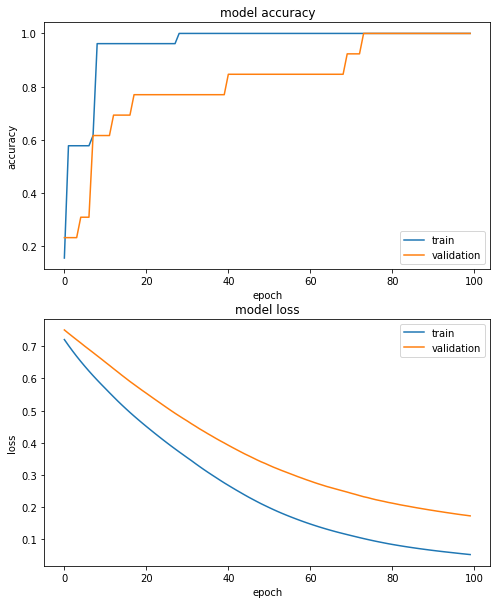

In [6]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()